In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
csv_path= '/Users/y1u0d2/Desktop/Lab/result/sf/merge_base/merge_O-O.csv'

In [16]:
df = pd.read_csv(csv_path)
df.columns
descriptor_labels = []
for column in df.columns:
    if 'sf_' in column:
        descriptor_labels.append(column)

descriptor_labels
target_label ='E_atom'
df

,Unnamed: 0,another_atom,center_atom,structure_idx,structure,sf_O-O_e-14.92_rs-1.0,sf_O-O_e-9.411_rs-1.259,sf_O-O_e-5.938_rs-1.585,sf_O-O_e-3.747_rs-1.995,sf_O-O_e-2.364_rs-2.512,sf_O-O_e-1.492_rs-3.162,sf_O-O_e-0.9411_rs-3.981,sf_O-O_e-0.5938_rs-5.012,sf_O-O_e-0.3747_rs-6.31,sf_O-O_e-0.2364_rs-7.943,natom,E,Vol,E_atom
0,0,O,O,422,stishovite,7.184671e-08,0.010321,5.680434,132.275466,335.169372,359.134938,696.412724,1001.236300,1149.820086,849.914799,48,-1011.339748,345.233252,-21.069578
1,1,O,O,348,stishovite,1.372792e-05,0.088863,10.928816,142.858925,324.656614,366.468282,703.540486,1012.352423,1161.927495,862.292771,48,-1010.282651,340.518733,-21.047555
2,2,O,O,354,stishovite,1.491263e-10,0.000713,1.256803,55.743109,283.263428,327.286552,504.890711,821.520873,901.573213,671.795452,48,-1011.223228,436.375518,-21.067151
3,3,O,O,436,stishovite,1.173923e-07,0.015917,6.974430,135.855538,329.396445,361.824396,695.786062,998.912659,1144.649336,848.632076,48,-1010.934431,345.233252,-21.061134
4,4,O,O,410,stishovite,1.422362e-08,0.003035,3.690276,122.978333,343.954812,369.491760,701.330460,997.197473,1153.145431,852.919609,48,-1011.425733,345.233252,-21.071369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8545,8545,O,O,627,beta-quartz,1.804601e-14,0.000006,0.125861,15.759621,97.526221,117.247129,204.859499,337.645470,361.849373,265.491499,36,-758.023464,614.263231,-21.056207
8546,8546,O,O,141,beta-quartz,9.251912e-11,0.000463,1.096702,40.559183,126.397254,170.371003,310.916087,450.529329,495.727915,378.679162,36,-757.869465,440.160169,-21.051930
8547,8547,O,O,169,beta-quartz,4.377670e-14,0.000014,0.276269,26.174279,116.028147,149.401323,272.344069,409.326399,438.243929,334.538831,36,-758.476665,497.119773,-21.068796
8548,8548,O,O,198,beta-quartz,3.603522e-11,0.000188,0.578298,29.752651,113.064879,149.707025,270.971824,406.854021,437.156971,334.045044,36,-757.743322,497.119773,-21.048426


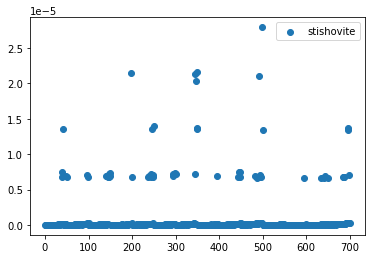

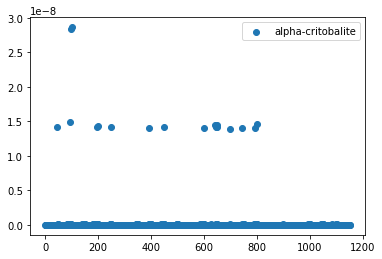

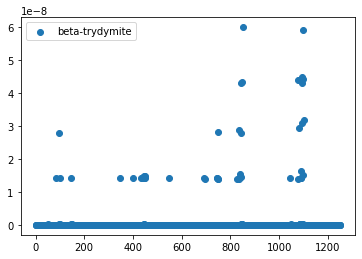

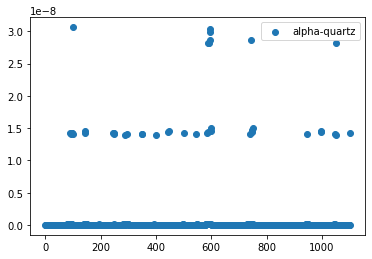

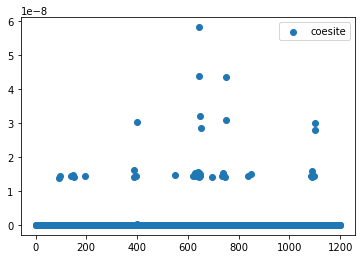

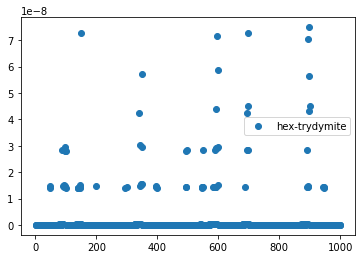

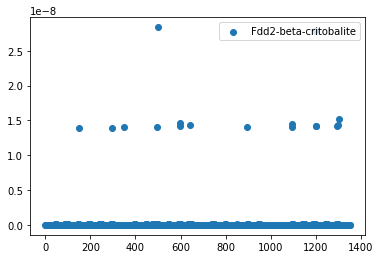

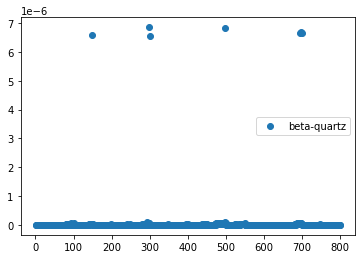

In [17]:
fig, ax = plt.subplots()
structures = df.structure.unique()
for structure in structures:
    plt.scatter(x=df[df.structure == structure].structure_idx,y=df[df.structure == structure][descriptor_labels[0]],label=structure)
    plt.legend()
    plt.show()

In [18]:
Xraw = df.loc[:, descriptor_labels].values
y = df.loc[:, target_label].values

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(Xraw)
X = scaler.transform(Xraw)

In [20]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
reg = LinearRegression()
reg.fit(X,y)
yp = reg.predict(X)
all_r2_score = reg.score(X,y)
print(all_r2_score)
print(reg.coef_, reg.intercept_)

0.21770948742313756
[ 0.00776654 -0.01362617  0.0202709  -0.01884972 -0.00227897 -0.00653855
 -0.01126078 -0.01142254  0.00467173  0.03224436] -21.061372010002078


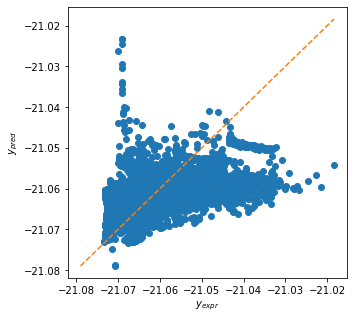

In [21]:
# 当てはめ度合い
plt.figure(figsize=(5,5))
yall = np.hstack([y,yp])
ylim = yall.min(), yall.max()
plt.plot(y,yp,"o")
plt.plot(ylim,ylim,"--")
plt.xlabel("$y_{expr}$")
plt.ylabel("$y_{pred}$")
plt.show()